<a href="https://colab.research.google.com/github/Nitin-Sagar-B/FMML_PROJECTS_AND_LABS/blob/main/Module%2001%20Lab%2002%20MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [5]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-5-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [6]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [7]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [8]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [9]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [10]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [12]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [13]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [14]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [15]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

My answers to the above questions:


1.   When we increase the percentage of the validation set, it typically leads to a decrease in training data available for the model. Conversely, when we reduce the size of the validation set, more data becomes available for training.

*   Nearest Neighbor: As you increase the validation set size, there's less training data to learn from. This may result in a higher chance of overfitting because the model hasn't seen enough diverse examples. Conversely, with a smaller validation set, you have more training data, which can help the model generalize better. However, if the validation set is too small, it might not effectively capture the model's performance.
*   Random classifiers are not influenced by the size of the validation set because they make predictions randomly. Their accuracy remains random and is not dependent on the data distribution.

  Due to these two reasons achieving a good balance between validation set, training set and testing set is very crucial as it affects the overall accuracy.


2.   The size of the training and validation sets has an effective impact on how well we can predict the accuracy on the test set using the validation set:

*   Nearest Neighbor: With a larger training set, the model can learn more from the data and might perform better on the validation set. This can lead to a better estimate of the model's true performance on the test set. On the other hand, if the validation set is small, it might not provide a reliable estimate of the model's performance.
*   I found out that Random classifiers will have unpredictable accuracy on both the validation and test sets because they make random guesses. The size of the sets won't significantly impact their predictability from what I understand.

3. The choice of the percentage for the validation set should strike a balance between having enough data for training and having a representative sample for validation. A common practice is to split the data into 60-80% training and 20-40% validation. However, I observed that this can vary depending on the size of your dataset and the specific problem you're working on.

*   Extreme values like 99.9% would leave very little data for training, likely resulting in poor model performance due to a lack of learning. Conversely, 0.1% for validation would not provide a representative sample to estimate model performance accurately.
*   I think it is essential to experiment with different validation set percentages and use techniques like cross-validation to find the right balance between training and validation data that suits your specific problem and dataset.


**I achieved these results based on the experiment below:**


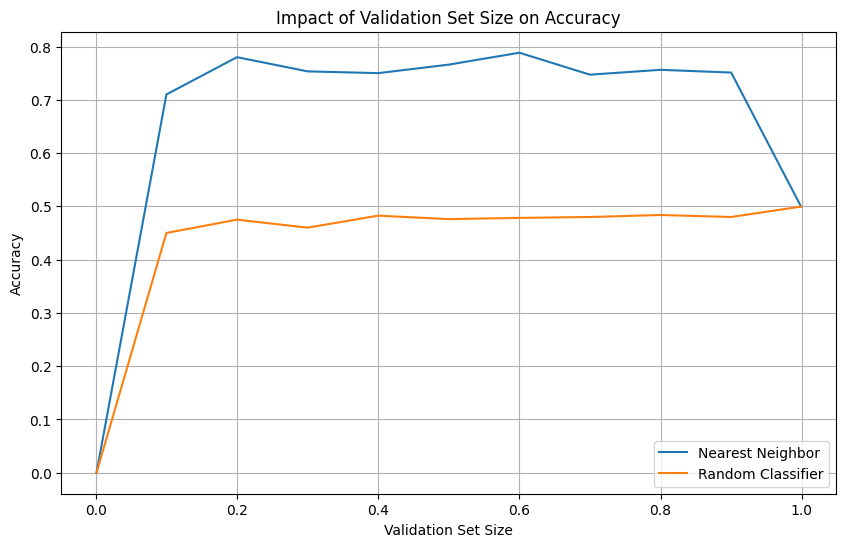

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

#create a synthetic dataset with more samples
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

def experiment(validation_sizes):
    nn_accuracies = []
    random_accuracies = []

    for val_size in validation_sizes:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=42)

        #reduce the number of neighbors for KNeighborsClassifier
        nn_classifier = KNeighborsClassifier(n_neighbors=1)  #reduced to 1 neighbor
        nn_classifier.fit(X_train, y_train)
        nn_accuracy = nn_classifier.score(X_val, y_val)
        nn_accuracies.append(nn_accuracy)

        random_classifier = DummyClassifier(strategy='uniform', random_state=42)
        random_classifier.fit(X_train, y_train)
        random_accuracy = random_classifier.score(X_val, y_val)
        random_accuracies.append(random_accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(validation_sizes, nn_accuracies, label='Nearest Neighbor')
    plt.plot(validation_sizes, random_accuracies, label='Random Classifier')
    plt.xlabel('Validation Set Size')
    plt.ylabel('Accuracy')
    plt.title('Impact of Validation Set Size on Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

validation_sizes = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.999]
experiment(validation_sizes)

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [17]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [18]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**My approach of answering the above questions:**
1.   Yes, according to what i understand averaging the validation accuracy across multiple splits provides more consistent results. When we split the data into multiple subsets (folds) and perform validation on each fold, we obtain a set of validation scores. Averaging these scores helps reduce the influence of random variations that can occur when using a single validation set. This, in turn, gives us a more stable and reliable estimate of the model's performance.<br><br>
2.   I think cross-validation gives a more accurate estimate of test accuracy compared to a single validation split. By evaluating the model on multiple subsets of the data and averaging the results, we get a better representation of how the model is likely to perform on unseen data. This approach is particularly useful when we have limited data because it maximizes the use of available information for both training and validation.<br><br>
3. The number of iterations (folds) in cross-validation has an important role in estimate's accuracy. In general, increasing the number of iterations tends to provide a more accurate estimate. However, there is a diminishing return effect. For example, going from 2-fold to 5-fold cross-validation often results in a significant improvement in estimate accuracy. Still, increasing it from 50-fold to 100-fold might not yield a substantial improvement.<br>
The choice of the number of iterations should consider the trade-off between computational cost and the desired level of estimate accuracy. It's common to use 5 or 10-fold cross-validation as a good balance between accuracy and computational efficiency.<br><br>
4. Increasing the number of iterations (folds) in cross-validation can help mitigate the impact of a very small training or validation dataset to some extent. However, there are limits to what cross-validation can compensate for. If the dataset is exceptionally small, even with a high number of iterations, each fold may still contain very little data for meaningful training or validation.<br>
In such cases, it's crucial to strike a balance between the number of iterations and the dataset's size. It may be more beneficial to allocate a larger portion of the data to either the training or validation set, depending on the specific problem. Increasing iterations alone cannot fully compensate for the limitations of extremely small datasets.


